<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Case_Tunning_Hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case

## Contexto:

Em um mundo financeiro cada vez mais competitivo, as fintechs e bancos tradicionais buscam inovar na oferta de produtos personalizados para seus clientes. Uma dessas ofertas, o empréstimo pessoal, representa uma oportunidade significativa tanto para os consumidores, que buscam crédito rápido e acessível, quanto para as instituições financeiras, que desejam maximizar a adesão ao produto mantendo um perfil de risco saudável. Neste cenário, a capacidade de prever com precisão a probabilidade de um cliente solicitar um empréstimo pessoal torna-se um ativo valioso.

## Desafio:

Você, como cientista de dados em uma instituição financeira de renome, recebeu a tarefa de desenvolver um modelo de machine learning que preveja a probabilidade de os clientes existentes solicitarem um empréstimo pessoal. O objetivo é identificar clientes em potencial para campanhas de marketing direcionadas, otimizando assim os recursos de marketing e aumentando a taxa de conversão de empréstimos pessoais.

## Dataset:

O dataset fornecido, "Bank_Personal_Loan_Modelling.xlsx", contém dados históricos dos clientes, incluindo idade, experiência, renda, situação familiar, média de gastos no cartão de crédito, nível educacional, hipoteca, entre outros. A variável target, "Personal_Loan", indica se o cliente aceitou um empréstimo pessoal na última campanha.

## Tarefa:

Sua tarefa é explorar o dataset, realizar a limpeza e o pré-processamento necessários e, em seguida, treinar e otimizar dois modelos: um DecisionTreeRegressor e um RandomForestClassifier. Você deve utilizar o GridSearch para encontrar os melhores hiperparâmetros para cada modelo, focando na otimização da métrica AUC-ROC.

## Entregáveis:

**Análise Exploratória de Dados**: Identifique padrões, tendências e relações nos dados que possam influenciar a decisão do cliente sobre o empréstimo pessoal.


**Pré-processamento de Dados**: Limpe e prepare os dados para modelagem, incluindo o tratamento de valores ausentes e a seleção de variáveis.


**Modelagem e Otimização**: Treine os modelos propostos e utilize o GridSearch para otimizar os hiperparâmetros. Compare o desempenho de ambos os modelos com base na métrica AUC-ROC.


**Avaliação de Modelo**: Forneça uma análise detalhada do desempenho dos modelos, incluindo acurácia, precisão, recall, F1-Score e AUC-ROC tanto para os conjuntos de treino quanto de teste.


**Identificação de Overfitting**: Discuta qualquer sinal de overfitting nos modelos e as estratégias utilizadas para mitigá-lo.


**Insights e Recomendações**: Com base nos resultados, forneça insights acerca dos clientes potenciais para empréstimo pessoal e recomendações para futuras campanhas de marketing.

In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx")
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
df = df.dropna()

# Análise Exploratória de Dados

A análise exploratória inicia-se com a visualização da distribuição da renda dos clientes, uma variável crucial que pode influenciar a decisão de solicitar um empréstimo pessoal. Um gráfico de histograma com uma curva de densidade permite observar a distribuição geral da renda, enquanto um boxplot compara diretamente a renda entre os clientes que aceitaram e não aceitaram o empréstimo pessoal, fornecendo insights sobre a relação entre renda e a probabilidade de aceitar um empréstimo.

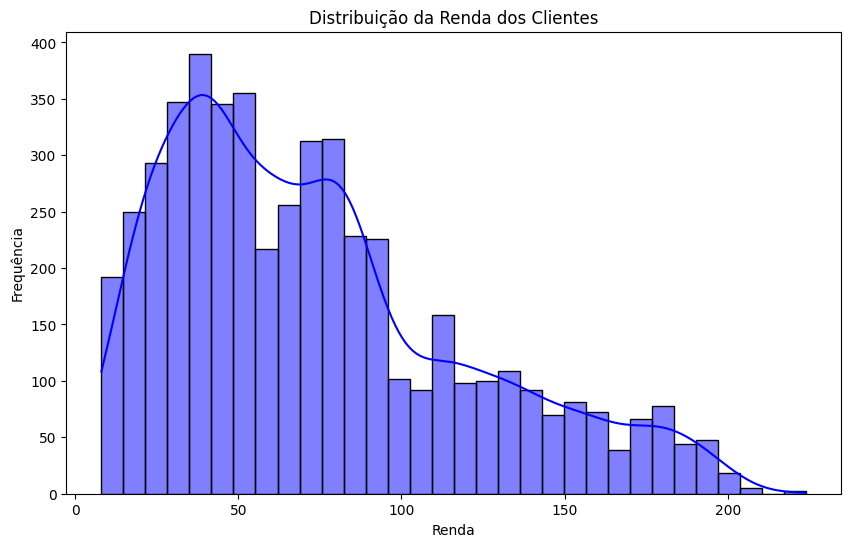

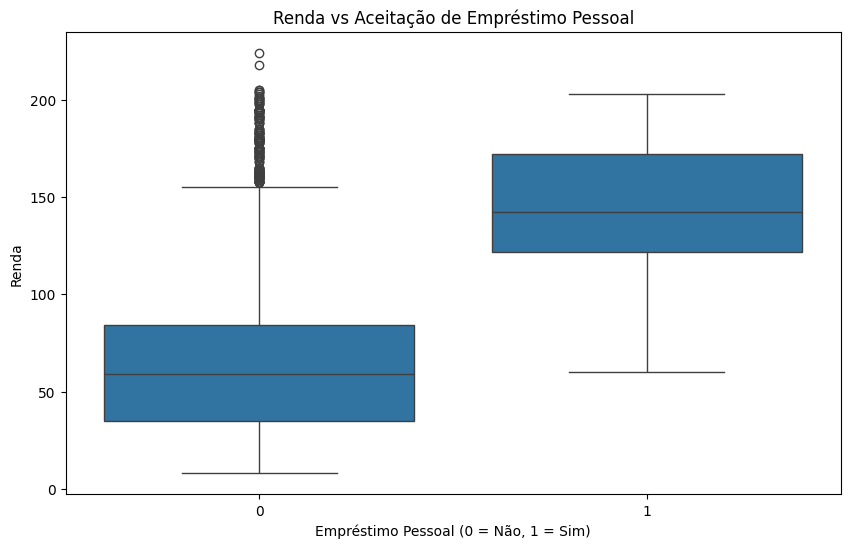

In [30]:
# Visualizando a distribuição da variável Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color='blue')
plt.title('Distribuição da Renda dos Clientes')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

# Relação entre Renda e Aceitação de Empréstimo Pessoal
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=df)
plt.title('Renda vs Aceitação de Empréstimo Pessoal')
plt.xlabel('Empréstimo Pessoal (0 = Não, 1 = Sim)')
plt.ylabel('Renda')
plt.show()

# Preparação dos Dados

**Objetivo**: Selecionar variáveis independentes (X) e a variável dependente (y), que é o target do nosso modelo (Personal Loan). A escolha dessas variáveis é baseada na hipótese de que elas influenciam a decisão de um cliente obter um empréstimo pessoal.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df['Personal_Loan'].copy()
y = pd.DataFrame(y)

**Objetivo**: Dividir o dataset em conjuntos de treino e teste, mantendo a proporção de categorias da variável target em ambos os conjuntos. Isso é crucial para garantir que o modelo seja treinado e testado em dados representativos.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Modelagem com DecisionTreeClassifier

**Objetivo**: Treinar um modelo de árvore de decisão para classificar se um cliente irá adquirir um empréstimo pessoal. Árvores de decisão são escolhidas pela facilidade de interpretação e capacidade de capturar relações não-lineares entre as variáveis.

In [9]:
from sklearn.tree import DecisionTreeClassifier

arvore_decisao = DecisionTreeClassifier()

In [10]:
arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier()

# Avaliação do Modelo

**Objetivo**: Importar métricas para avaliar o desempenho do modelo. A acurácia indica a proporção geral de previsões corretas, enquanto a acurácia balanceada considera o equilíbrio entre classes. Precision e recall focam na performance do modelo em prever a classe positiva, e o F1-Score é uma média harmônica entre precision e recall. ROCAUC avalia a capacidade do modelo de discriminar entre as classes positiva e negativa.

**Análise**: As métricas de treino indicam overfitting, visto que a acurácia e outras métricas no conjunto de treino são perfeitas ou quase perfeitas.

In [11]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, arvore_decisao.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, arvore_decisao.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, arvore_decisao.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 1.0
Acurácia (Teste): 0.985
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.9591168879056047
Precision (Treino): 1.0
Precision (Teste): 0.9175257731958762
Recall (Treino): 1.0
Recall (Teste): 0.9270833333333334
F1-Score (Treino): 1.0
F1-Score (Teste): 0.9222797927461139
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.9591168879056048


# Resolução de Overfitting com GridSearchCV

**Objetivo**: Utilizar GridSearchCV para encontrar o melhor max_depth para a árvore de decisão, otimizando a métrica ROCAUC. Isso ajuda a encontrar um equilíbrio entre aprendizado e generalização, reduzindo o overfitting.

In [12]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

# Criamos um dicionário que os hiperparâmetros que queremos treinar o modelo
parameters = {
  'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Criamos um GridSearch passando o modelo, os parâmetros, a métrica que queremos otimizar.
grid_search = GridSearchCV(arvore_decisao, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [14]:
grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [15]:
arvore_decisao = DecisionTreeClassifier(ccp_alpha = 0.0,
 class_weight= None,
 criterion = 'gini',
 max_depth = 3,
 max_features = None,
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 random_state = None,
 splitter = 'best')

In [17]:
arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, arvore_decisao.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, arvore_decisao.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, arvore_decisao.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, arvore_decisao.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, arvore_decisao.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.98275
Acurácia (Teste): 0.987
Acurácia Balanceada (Treino): 0.9229581489675516
Acurácia Balanceada (Teste): 0.9369469026548672
Precision (Treino): 0.9673590504451038
Precision (Teste): 0.9882352941176471
Recall (Treino): 0.8489583333333334
Recall (Teste): 0.875
F1-Score (Treino): 0.9042995839112344
F1-Score (Teste): 0.9281767955801106
ROCAUC (Treino): 0.9945853354304941
ROCAUC (Teste): 0.9955176069321534


In [19]:
# criando uma tabela com os resultados do grid_search
results = pd.DataFrame(grid_search.cv_results_)

# rankeando esses resultados
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.020095,0.005944,0.022752,0.005718,4,{'max_depth': 4},0.994639,0.992474,0.994620,0.982576,0.994441,0.991750,0.004658,1
4,0.021597,0.005145,0.025400,0.009188,5,{'max_depth': 5},0.996274,0.994180,0.987947,0.983043,0.994503,0.991190,0.004953,2
2,0.020591,0.007241,0.020369,0.005991,3,{'max_depth': 3},0.989541,0.992599,0.994494,0.981463,0.995060,0.990632,0.004973,3
5,0.012718,0.003550,0.014786,0.003835,6,{'max_depth': 6},0.996765,0.987696,0.983322,0.981831,0.956054,0.981133,0.013577,4
6,0.019614,0.004982,0.020978,0.007285,7,{'max_depth': 7},0.988078,0.974403,0.965072,0.969742,0.957177,0.970894,0.010305,5
1,0.021600,0.007430,0.030044,0.009133,2,{'max_depth': 2},0.946878,0.974116,0.962647,0.947405,0.948366,0.955882,0.010841,6
7,0.019820,0.006166,0.022252,0.007442,8,{'max_depth': 8},0.975783,0.961084,0.958093,0.957285,0.925473,0.955544,0.016457,7
8,0.015134,0.004311,0.019179,0.009469,9,{'max_depth': 9},0.961826,0.962476,0.950504,0.964254,0.918198,0.951452,0.017319,8
9,0.013609,0.001979,0.020739,0.007265,10,{'max_depth': 10},0.948486,0.962305,0.938020,0.957393,0.898762,0.940993,0.022679,9
0,0.013670,0.004543,0.020545,0.008411,1,{'max_depth': 1},0.809356,0.860107,0.841048,0.836477,0.815074,0.832412,0.018386,10


# Aplicação do RandomForestClassifier

**Objetivo**: Treinar um modelo de RandomForestClassifier, que usa múltiplas árvores de decisão para melhorar a generalização. A RandomForestClassifier é menos propensa a overfitting em comparação com uma única árvore de decisão.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [21]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

In [22]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [23]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,1.846452,0.507375,0.067803,0.002049,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.997110,0.998761,0.996964,0.994467,0.996354,0.996731,0.001384,1
29,2.305775,0.145948,0.097187,0.012006,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.996511,0.998653,0.997180,0.995096,0.995994,0.996687,0.001196,2
27,0.575826,0.148911,0.040526,0.007399,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.996365,0.998707,0.997683,0.994593,0.995761,0.996622,0.001442,3
26,2.377870,0.022796,0.102490,0.000935,9,500,"{'max_depth': 9, 'n_estimators': 500}",0.996892,0.998761,0.996677,0.994988,0.995204,0.996504,0.001361,4
25,1.666664,0.306551,0.067128,0.001742,9,300,"{'max_depth': 9, 'n_estimators': 300}",0.996511,0.998761,0.996713,0.994503,0.995258,0.996349,0.001454,5


In [24]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
rf =  RandomForestClassifier(bootstrap = True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth = 9,
 max_features= 'auto',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 500,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

In [26]:
rf.fit(X_train, y_train)

<ipython-input-26-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=500)

In [27]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.99575
Acurácia (Teste): 0.993
Acurácia Balanceada (Treino): 0.9778645833333333
Acurácia Balanceada (Teste): 0.9635416666666667
Precision (Treino): 1.0
Precision (Teste): 1.0
Recall (Treino): 0.9557291666666666
Recall (Teste): 0.9270833333333334
F1-Score (Treino): 0.9773635153129161
F1-Score (Teste): 0.9621621621621621
ROCAUC (Treino): 0.9999791148137905
ROCAUC (Teste): 0.9991357853982301


# Conclusão e Insights

Este case demonstra a aplicação de técnicas avançadas de machine learning para prever a probabilidade de clientes adquirirem empréstimos pessoais. Através da análise exploratória, preparação dos dados, escolha e avaliação de modelos, e otimização de hiperparâmetros, podemos alcançar insights valiosos sobre os fatores que influenciam a decisão de empréstimo e melhorar a precisão das previsões. A abordagem metódica e a atenção aos detalhes, como o ajuste para evitar overfitting e a escolha de métricas de avaliação apropriadas, são cruciais para o sucesso de projetos de ciência de dados no setor financeiro.